## Import Dependencies

In [158]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt 

## Load In Dataset

In [159]:
df = pd.read_csv('../Datasets/Acumeal_New_Database1.csv')
df.head()

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Mealplan
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,1
1,40,Female,No,No,Yes,Yes,No,No,Yes,Yes,2
2,16,Male,No,No,No,No,Yes,No,Yes,No,1
3,30,Female,No,Yes,No,No,No,Yes,No,No,0
4,60,Male,Yes,Yes,Yes,No,No,Yes,No,Yes,0


## Data Exploratory Analysis 

In [160]:
# mapping = {'high': 1, 'low': 0}
# df['Mealplan'].replace({'high': mapping, 'low': mapping})

# df['Mealplan'] = df['Mealplan'].map({'high':1,'low':0})
# d


In [161]:
df['Mealplan'].value_counts()

0    56
1    48
2    25
Name: Mealplan, dtype: int64

In [162]:
df.Age.mean()

35.27131782945737

In [163]:
df.dtypes

Age               int64
Gender           object
Any_Allergies    object
Workout_Often    object
High_BP          object
Diabetes         object
Build_Muscle     object
Lose_Weight      object
Often_Hungry     object
Eat_Snacks       object
Mealplan          int64
dtype: object

In [164]:
# cd = {'high': 1, 'low': 0}
# df['Mealplan'].replace(cd, inplace=True)

In [165]:
df.head(2)

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Mealplan
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,1
1,40,Female,No,No,Yes,Yes,No,No,Yes,Yes,2


## Turn Categories Into Numbers

In [166]:
X = df.drop('Mealplan', axis=1)
y = df['Mealplan']

In [167]:
from sklearn.preprocessing import LabelEncoder

le_workout_often = LabelEncoder()
le_gender = LabelEncoder()
le_high_bp = LabelEncoder()
le_diabetes = LabelEncoder()
le_build_muscle = LabelEncoder()
le_lost_weight = LabelEncoder()
le_allergies_often = LabelEncoder()
le_often_hungry = LabelEncoder()
le_eat_snacks = LabelEncoder()


X['Workout_often_n'] = le_workout_often.fit_transform(X['Workout_Often'])
X['Any_Allergies_n'] = le_allergies_often.fit_transform(X['Any_Allergies'])
X['Gender_n'] = le_gender.fit_transform(X['Gender'])
X['High_BP_n'] = le_high_bp.fit_transform(X['High_BP'])
X['Diabetes_n'] = le_diabetes.fit_transform(X['Diabetes '])
X['Build_muscle_n'] = le_build_muscle.fit_transform(X['Build_Muscle'])
X['Lose_weight_n'] = le_lost_weight.fit_transform(X['Lose_Weight'])
X['Often_Hungry_n'] = le_often_hungry.fit_transform(X['Often_Hungry'])
X['Eat_Snacks'] = le_eat_snacks.fit_transform(X['Eat_Snacks'])
X.head()

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Workout_often_n,Any_Allergies_n,Gender_n,High_BP_n,Diabetes_n,Build_muscle_n,Lose_weight_n,Often_Hungry_n
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,1,1,1,1,0,0,1,0,1
1,40,Female,No,No,Yes,Yes,No,No,Yes,1,0,0,0,1,1,0,0,1
2,16,Male,No,No,No,No,Yes,No,Yes,0,0,0,1,0,0,1,0,1
3,30,Female,No,Yes,No,No,No,Yes,No,0,1,0,0,0,0,0,1,0
4,60,Male,Yes,Yes,Yes,No,No,Yes,No,1,1,1,1,1,0,0,1,0


In [168]:
## Drop Categorical Columns
inputs_n = X.drop(['Workout_Often', 'Often_Hungry','Any_Allergies','Gender', 'High_BP', 'Diabetes ', 'Build_Muscle', 'Lose_Weight'], axis=1)
inputs_n

,Age,Eat_Snacks,Workout_often_n,Any_Allergies_n,Gender_n,High_BP_n,Diabetes_n,Build_muscle_n,Lose_weight_n,Often_Hungry_n
0,22,1,1,1,1,0,0,1,0,1
1,40,1,0,0,0,1,1,0,0,1
2,16,0,0,0,1,0,0,1,0,1
3,30,0,1,0,0,0,0,0,1,0
4,60,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
124,23,0,0,0,1,0,0,0,1,0
125,40,1,1,1,0,0,1,0,0,1
126,36,1,1,1,1,0,0,0,1,1
127,45,0,0,0,0,0,0,0,0,1


# Apply Decision Tree Model

In [169]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


# Split the data
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size=0.25, random_state=0)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Instantiate the model 
clf = DecisionTreeClassifier(random_state=0)

# Fit the model 
clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Model Evaluation

In [170]:
# predictions
y_pred = clf.predict(X_test)
y_pred 

array([0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1])

In [171]:
# actual
np.array(y_test)

array([0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1])

In [172]:
# Accuracy 
print(np.mean(np.array(clf.predict(X_test) == y_test)))

0.8787878787878788


In [174]:
accuracy_score(y_test,y_pred)

0.8787878787878788

In [176]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  1],
       [ 3, 13,  0],
       [ 0,  0,  4]])

In [177]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(clf,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.949
Precision score : 0.954
Recall score : 0.957
F1 score : 0.950


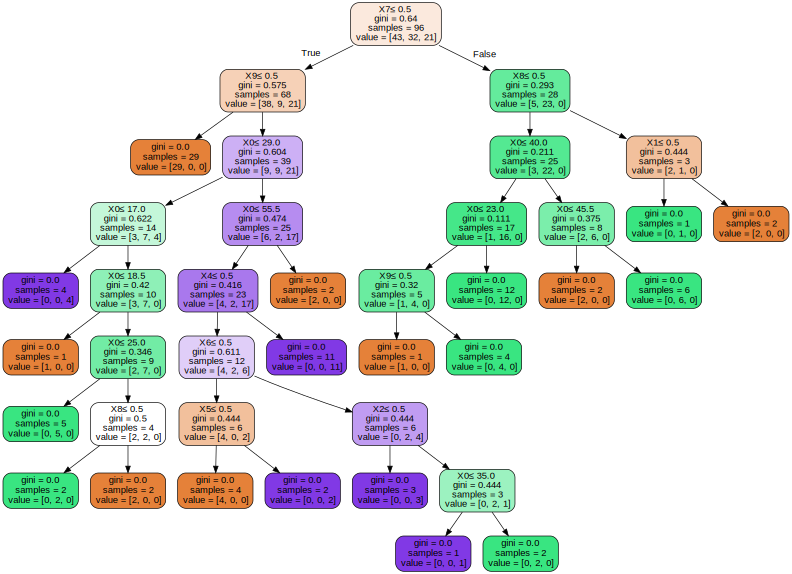

In [178]:
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(clf.fit(X_train, y_train),out_file=None,   
                         filled=True, rounded=True,  
                         special_characters=True
                       )

pydot_graph = pydotplus.graph_from_dot_data(data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"11,12!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

# Categorical Mealplan Values

In [79]:
data = pd.read_csv('../Datasets/Acumeal_New_Database1.csv')
data.head()

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Mealplan
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,1
1,40,Female,No,No,Yes,Yes,No,No,Yes,Yes,2
2,16,Male,No,No,No,No,Yes,No,Yes,No,1
3,30,Female,No,Yes,No,No,No,Yes,No,No,0
4,60,Male,Yes,Yes,Yes,No,No,Yes,No,Yes,0


In [80]:
X = data.drop('Mealplan', axis=1)
y = data['Mealplan']

#X = pd.get_dummies(data[['Age', 'Workout_Often', 'Gender', 'High_BP', 'Diabetes ', 'Build_Muscle', 'Lose_Weight', 'Metabolism']])

## Convert Inputs to Numbers

In [81]:
from sklearn.preprocessing import LabelEncoder

le_workout_often = LabelEncoder()
le_gender = LabelEncoder()
le_high_bp = LabelEncoder()
le_diabetes = LabelEncoder()
le_build_muscle = LabelEncoder()
le_lost_weight = LabelEncoder()
le_allergies_often = LabelEncoder()
le_often_hungry = LabelEncoder()
le_eat_snacks = LabelEncoder()


X['Workout_often_n'] = le_workout_often.fit_transform(X['Workout_Often'])
X['Any_Allergies_n'] = le_allergies_often.fit_transform(X['Any_Allergies'])
X['Gender_n'] = le_gender.fit_transform(X['Gender'])
X['High_BP_n'] = le_high_bp.fit_transform(X['High_BP'])
X['Diabetes_n'] = le_diabetes.fit_transform(X['Diabetes '])
X['Build_muscle_n'] = le_build_muscle.fit_transform(X['Build_Muscle'])
X['Lose_weight_n'] = le_lost_weight.fit_transform(X['Lose_Weight'])
X['Often_Hungry_n'] = le_often_hungry.fit_transform(X['Often_Hungry'])
X['Eat_Snacks'] = le_eat_snacks.fit_transform(X['Eat_Snacks'])

X.head()

,Age,Gender,Any_Allergies,Workout_Often,High_BP,Diabetes,Build_Muscle,Lose_Weight,Often_Hungry,Eat_Snacks,Workout_often_n,Any_Allergies_n,Gender_n,High_BP_n,Diabetes_n,Build_muscle_n,Lose_weight_n,Often_Hungry_n
0,22,Male,Yes,Yes,No,No,Yes,No,Yes,1,1,1,1,0,0,1,0,1
1,40,Female,No,No,Yes,Yes,No,No,Yes,1,0,0,0,1,1,0,0,1
2,16,Male,No,No,No,No,Yes,No,Yes,0,0,0,1,0,0,1,0,1
3,30,Female,No,Yes,No,No,No,Yes,No,0,1,0,0,0,0,0,1,0
4,60,Male,Yes,Yes,Yes,No,No,Yes,No,1,1,1,1,1,0,0,1,0


### Drop Categorical Columns

In [82]:
## Drop Categorical Columns
inputs_n = X.drop(['Workout_Often', 'Often_Hungry','Any_Allergies','Gender', 'High_BP', 'Diabetes ', 'Build_Muscle', 'Lose_Weight'], axis=1)
inputs_n

,Age,Eat_Snacks,Workout_often_n,Any_Allergies_n,Gender_n,High_BP_n,Diabetes_n,Build_muscle_n,Lose_weight_n,Often_Hungry_n
0,22,1,1,1,1,0,0,1,0,1
1,40,1,0,0,0,1,1,0,0,1
2,16,0,0,0,1,0,0,1,0,1
3,30,0,1,0,0,0,0,0,1,0
4,60,1,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
124,23,0,0,0,1,0,0,0,1,0
125,40,1,1,1,0,0,1,0,0,1
126,36,1,1,1,1,0,0,0,1,1
127,45,0,0,0,0,0,0,0,0,1


In [107]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier



# Apply (Multi-Classification) Support Vector Machine 
- SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the kernel function (here, linear). 

In [130]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size=0.2, random_state=0)

svm = SVC(kernel='linear',gamma='scale',C=1)
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## SVM Model Evaluation 

In [135]:
## Predictions
svm_predictions = svm.predict(X_test)
svm_predictions

array([1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2,
       0, 1, 0, 0])

In [137]:
np.array(y_test)

array([0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [140]:
svm_predictions.shape

(26,)

### Accuracy

In [138]:
print(np.mean(np.array(svm.predict(X_test)) == y_test))

0.5384615384615384


In [141]:
# Model Accuracy
accuracy_score(y_test, svm_predictions)

0.5384615384615384

In [142]:
cm = confusion_matrix(y_test, svm_predictions)
cm

array([[6, 1, 4],
       [3, 8, 2],
       [1, 1, 0]])

In [143]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score



scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
scores = cross_validate(svm,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.660
Precision score : 0.627
Recall score : 0.612
F1 score : 0.600


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Apply K-Nearest Neighbors Classifier
- KNN or k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Split training data
X_train, X_test, y_train, y_test = train_test_split(inputs_n, y, test_size=0.2, random_state=0)

# Training a KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
#the value of k is non-parametric and a general rule of thumb in choosing the value of k is k = sqrt(N)/2, 
#where N stands for the number of samples in your training dataset

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Model Evaluation

In [194]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1,
       0, 1, 0, 0])

In [195]:
np.array(y_test)

array([0, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

### Accuracy

In [196]:
print(np.mean(np.array(knn.predict(X_test)==y_test)))

0.5384615384615384


In [198]:
accuracy = accuracy_score(y_test, knn_pred)
accuracy

0.5384615384615384

## Hyper-Parameter Tuning

In [199]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score



scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}

# cross validation with 10 fold
scores = cross_validate(knn,inputs_n,y, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precision score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.667
Precision score : 0.713
Recall score : 0.672
F1 score : 0.658


# Apply Random Forest Ensemble Classifier
- 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 


# Gradient Boosting Classifier
Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

# Export Model 

In [28]:
import pickle 

pickle.dump(clf_entropy, open("decision_tree1.pkl", "wb")) 